# Data Exploration

Understand data structre and find main characteristics
1. Data Analysis
2. Statistical Analysis
3. Dtat Quality and Reliability
4. Selection of preprocessing steps

## Preparation for data Exploration
Understanding struture
Access and loading

In [ ]:
# Importing necessary tools
import numpy as np
import pandas
from pandas import DataFrame as df
import argparse
import rasterio
import os
from numpy import load
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
data = load('Sen2Fire\scene1\scene_1_patch_32_27.npz')
# Check files
lst = data.files
for item in lst:
    print(item)
    print(data[item])

image
[[[ 689  689  689 ...  478  478  478]
  [ 689  689  689 ...  478  478  478]
  [ 689  689  689 ...  478  478  478]
  ...
  [ 338  338  338 ...  549  549  549]
  [ 338  338  338 ...  549  549  549]
  [ 338  338  338 ...  549  549  549]]

 [[ 722  736  721 ...  624  618  561]
  [ 717  722  744 ...  612  570  497]
  [ 739  704  717 ...  522  510  498]
  ...
  [ 402  402  414 ...  628  652  618]
  [ 393  393  386 ...  632  631  625]
  [ 406  406  401 ...  619  602  613]]

 [[ 777  780  794 ...  694  714  656]
  [ 738  777  805 ...  683  659  592]
  [ 786  777  784 ...  621  625  569]
  ...
  [ 546  546  519 ...  714  711  697]
  [ 521  521  513 ...  728  703  686]
  [ 505  505  507 ...  714  697  679]]

 ...

 [[2034 2034 2034 ... 2018 2018 2018]
  [2034 2034 2034 ... 2018 2018 2018]
  [2034 2034 2034 ... 2018 2018 2018]
  ...
  [1923 1923 1923 ... 2169 2169 2169]
  [1923 1923 1923 ... 2169 2169 2169]
  [1923 1923 1923 ... 2169 2169 2169]]

 [[2399 2449 2449 ... 2656 2656 2543]
  [239

In [3]:
#Check Keys
for key in data.keys():
    print(key)                     
    print(data[key]) 

image
[[[ 689  689  689 ...  478  478  478]
  [ 689  689  689 ...  478  478  478]
  [ 689  689  689 ...  478  478  478]
  ...
  [ 338  338  338 ...  549  549  549]
  [ 338  338  338 ...  549  549  549]
  [ 338  338  338 ...  549  549  549]]

 [[ 722  736  721 ...  624  618  561]
  [ 717  722  744 ...  612  570  497]
  [ 739  704  717 ...  522  510  498]
  ...
  [ 402  402  414 ...  628  652  618]
  [ 393  393  386 ...  632  631  625]
  [ 406  406  401 ...  619  602  613]]

 [[ 777  780  794 ...  694  714  656]
  [ 738  777  805 ...  683  659  592]
  [ 786  777  784 ...  621  625  569]
  ...
  [ 546  546  519 ...  714  711  697]
  [ 521  521  513 ...  728  703  686]
  [ 505  505  507 ...  714  697  679]]

 ...

 [[2034 2034 2034 ... 2018 2018 2018]
  [2034 2034 2034 ... 2018 2018 2018]
  [2034 2034 2034 ... 2018 2018 2018]
  ...
  [1923 1923 1923 ... 2169 2169 2169]
  [1923 1923 1923 ... 2169 2169 2169]
  [1923 1923 1923 ... 2169 2169 2169]]

 [[2399 2449 2449 ... 2656 2656 2543]
  [239

In [ ]:
# Playing around to find data type and 
# dtype, shape column
#data.items
#print(data.get)

<bound method Mapping.get of <numpy.lib.npyio.NpzFile object at 0x000001DC20F063A0>>


Looking at the labels

In [13]:
label_df= data['label']
print('Label type, shape, size')
print(label_df.dtype)
print(label_df.shape)
print(label_df.size)

Label type, shape, size
uint8
(512, 512)
262144


Looking at aerosols data

In [14]:
aer_df= data['aerosol']
print('Label type, shape, size')
print(aer_df.dtype)
print(aer_df.shape)
print(aer_df.size)

Label type, shape, size
float32
(512, 512)
262144


Looking at the image

In [ ]:
import matplotlib.pyplot as plt
img_df= data['image']
print('Label type, shape, size')
print(img_df.dtype)
print(img_df.shape)
print(img_df.size)


Label type, shape, size
int16
(12, 512, 512)
3145728


## Understanging data
Missing data
Duplicates


In [ ]:
#label missing data
print(np.isnan(label_df).sum())
print(np.equal(label_df, None).sum())

0
0


In [25]:
print(np.isnan(aer_df).sum())
print(np.equal(aer_df, None).sum())

0
0


In [26]:
#Image missing data
print(np.isnan(img_df).sum())
print(np.equal(img_df, None).sum())

0
0


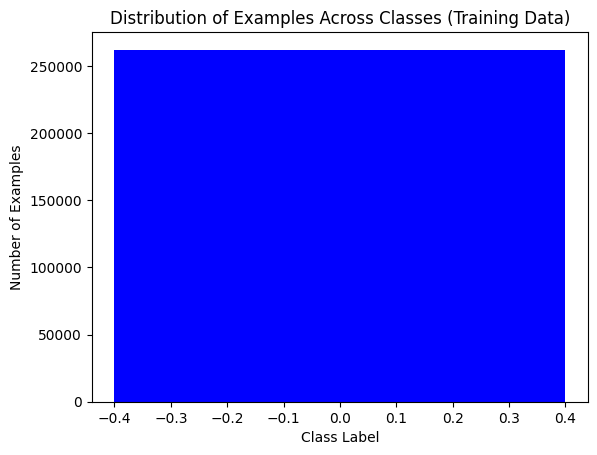

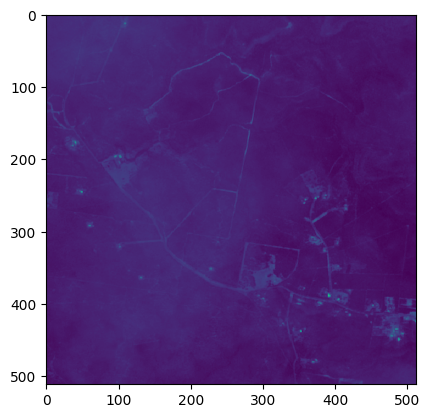

In [27]:
# visualize class distribution
class_labels, class_counts = np.unique(label_df, return_counts=True)

plt.bar(class_labels, class_counts, color='blue')
plt.xlabel('Class Label')
plt.ylabel('Number of Examples')
plt.title('Distribution of Examples Across Classes (Training Data)')
plt.savefig("ClassDistribution.png") 
plt.show()

##-----------------------------------------------------------------------------------------------------------##

# Visualizing a sample image from dataset
plt.figure()
plt.imshow(img_df[1]) # Convert tensor to numpy array
plt.show()



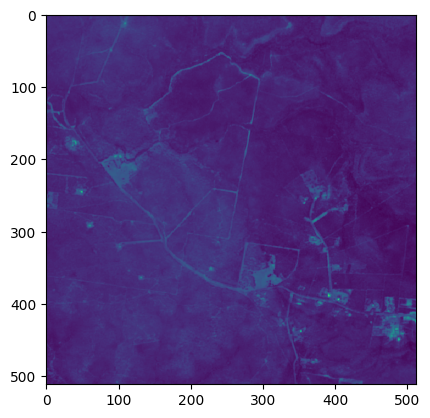

In [29]:
# Visualizing a sample image from dataset
plt.figure()
plt.imshow(img_df[3]) # Convert tensor to numpy array
plt.show()

In [34]:
from scipy import stats
print('STATISTICS')
#for arr in aer_df:
#    print(stats.describe(arr))
aer_conc = np.concatenate(aer_df)
print(stats.describe(aer_conc))
#print(stats.describe(aer_df))
#print(stats.describe(img_df))

STATISTICS
DescribeResult(nobs=262144, minmax=(2.9267886, 3.156582), mean=2.9765732, variance=0.00346916141890471, skewness=1.3577071497211632, kurtosis=0.6263121355021926)


# Looking at the Entire Dataset
Read the whole dataset sceneby scene. Get statistics, categorical breakdown and distribution

In [ ]:

import numpy as np
import os
import glob
from scipy import stats

#files = glob.glob(os.path.join(tmp_dir, '*.npz'))
# Directory containing NPZ files to merge
scene1_directory = 'Sen2Fire\scene1'

def mergeData(scene1_directory):

    # Get a list of all NPZ files in the directory
    npz_files = [f for f in os.listdir(scene1_directory) if f.endswith('.npz')]

    # Initialize an empty dictionary to hold the merged data
    merged_data = {}

    # Loop through the NPZ files and load their data
    for npz_file in npz_files:
        data = np.load(os.path.join(scene1_directory, npz_file))

        # Iterate through the arrays in each NPZ file and add them to the merged_data dictionary
        for key in data.files:
            if key in merged_data:
                merged_data[key] = np.concatenate([merged_data[key], data[key]])
            else:
                merged_data[key] = data[key]
    return merged_data

def analysis(sceneData):
    aer_df= sceneData['aerosol']
    label_df= sceneData['label']
    img_df= sceneData['image']
    print('----------------------CATEGORIZATION AND GENERAL IMAGE PING-------------------------------')
    # visualize class distribution
    class_labels, class_counts = np.unique(label_df, return_counts=True)

    plt.bar(class_labels, class_counts, color='blue')
    plt.xlabel('Class Label')
    plt.ylabel('Number of Examples')
    plt.title('Distribution of Examples Across Classes (Training Data)')
    plt.savefig("ClassDistribution.png") 
    plt.show()

    ##-----------------------------------------------------------------------------------------------------------##

    # Visualizing a sample image from dataset
    plt.figure()
    plt.imshow(img_df[1]) # Convert tensor to numpy array
    plt.show()
    print('----------------------FINDING MISSING VALUES-------------------------------')

    # Find missing values
    #label missing data
    print(np.isnan(label_df).sum())
    print(np.equal(label_df, None).sum())
    print(np.isnan(aer_df).sum())
    print(np.equal(aer_df, None).sum())
    #Image missing data
    print(np.isnan(img_df).sum())
    print(np.equal(img_df, None).sum())

    print('STATISTICS')
    aer_conc = np.concatenate(aer_df)
    #img_conc = np.concatenate(img_df)
    print(stats.describe(aer_conc))
    #print(stats.describe(img_conc))



### Scene 1

----------------------CATEGORIZATION AND GENERAL IMAGE PING-------------------------------


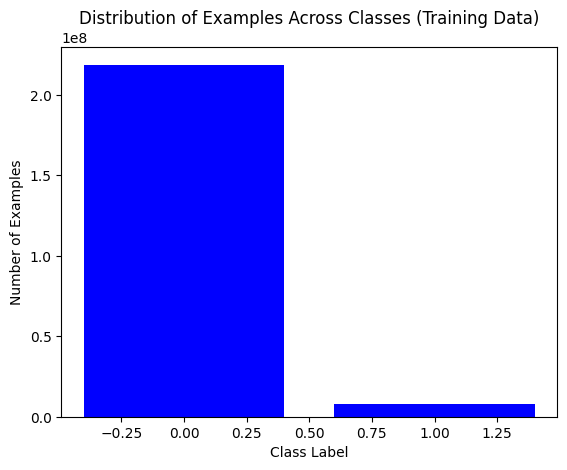

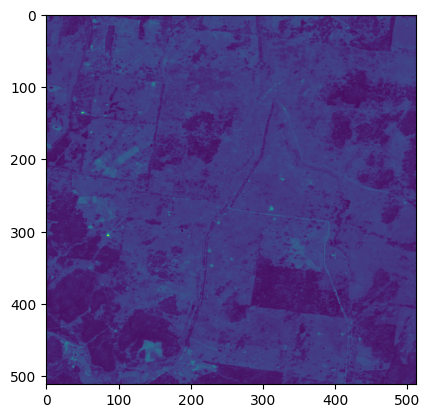

----------------------FINDING MISSING VALUES-------------------------------
0
0
0
0
0
0
STATISTICS
DescribeResult(nobs=226492416, minmax=(-1.6753272, 7.1280723), mean=0.6391627, variance=5.433537984042424, skewness=1.2058853964791734, kurtosis=0.3816285663458423)


MemoryError: Unable to allocate 20.2 GiB for an array with shape (5308416, 512) and data type float64

In [36]:
#Scene1
scene1_directory = 'Sen2Fire\scene1'
scene1_data = mergeData(scene1_directory)
analysis(scene1_data)

### Scene 2

In [ ]:
#Scene2
scene2_directory = 'Sen2Fire\scene2'
scene2_data = mergeData(scene2_directory)
analysis(scene2_data)

### Scene 3

In [ ]:
#Scene3
scene3_directory = 'Sen2Fire\scene3'
scene3_data = mergeData(scene3_directory)
analysis(scene3_data)

### Scene 4

In [ ]:
#Scene4
scene4_directory = 'Sen2Fire\scene4'
scene4_data = mergeData(scene4_directory)
analysis(scene4_data)

## Statistical Analysis
Categorical data analysis
Patterns

### Data Characteristics
Central tendency
Spread (standard dev)
Distribution and Outliers
> Min/Max, Percentiles

In [ ]:
stat_summary= data.describe()

### Outlier detection
An outluer is z > 3*std

In [ ]:
z_scores = np.abs(stats.zscore(df[[‘column1', ‘column2’, ....]]))
outliers_z = df[(z_scores > 3).any(axis=1)]

# REFERENCES
NPZ file Explortion: https://stackoverflow.com/questions/31368710/how-to-open-an-npz-file
Lecture Notes

